In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

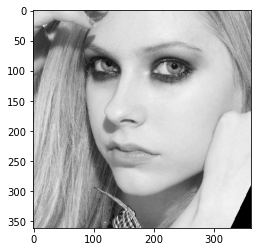

In [2]:
img = cv2.imread('girl.png', 0)
_ = plt.imshow(img, cmap='gray')

In [3]:
img.shape

(361, 361)

In [4]:
img = img.astype(np.float32)

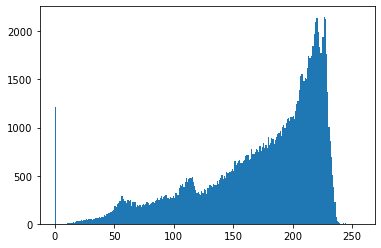

In [5]:
_ = plt.hist(img.ravel(), 256, [0, 256])

In [6]:
class Filter:
    # padding has 2 values: 'valid' (image's dimenstions are cut off), 'same' (the image's dimensions remain)
    # dimension of image: N x M
    # dimension of kernel: ksize x ksize and ksize is an odd number
    def __init__(self, img, ksize=3, padding='valid'):
        self.ksize = ksize
        N = img.shape[0]
        M = img.shape[1]
        if padding == 'same':
            self.img_filtered = np.zeros_like(img)
            self.img_pad = np.pad(img.copy(), ksize//2)
        if padding == 'valid': 
            self.img_filtered = np.zeros((N-ksize+1, M-ksize+1))
            self.img_pad = img.copy()
    
    # Convolution spatial filters
    def Convolution(self, kernel):
        img_filtered = self.img_filtered.copy()
        img_pad = self.img_pad.copy()
        for i in range(self.img_filtered.shape[0]):
            for j in range(self.img_filtered.shape[1]):
                img_filtered[i, j] = (kernel * img_pad[i:i+self.ksize, j:j+self.ksize]).sum()
        return img_filtered
    
    # Nonlinear filters
    def Nonlinear(self, name='median'): # name can be: 'median', 'max', 'min'
        img_filtered = self.img_filtered.copy()
        img_pad = self.img_pad.copy()
        for i in range(self.img_filtered.shape[0]):
            for j in range(self.img_filtered.shape[1]):
                if name == 'median':
                    img_filtered[i, j] = np.median(img_pad[i:i+self.ksize, j:j+self.ksize])
                if name == 'max':
                    img_filtered[i, j] = np.max(img_pad[i:i+self.ksize, j:j+self.ksize])
                if name == 'min':
                    img_filtered[i, j] = np.min(img_pad[i:i+self.ksize, j:j+self.ksize])
        return img_filtered

# With zero padding
When using built-in functions of Opencv, we will have different values at the boundary due to Opencv's padding being not zero padding.

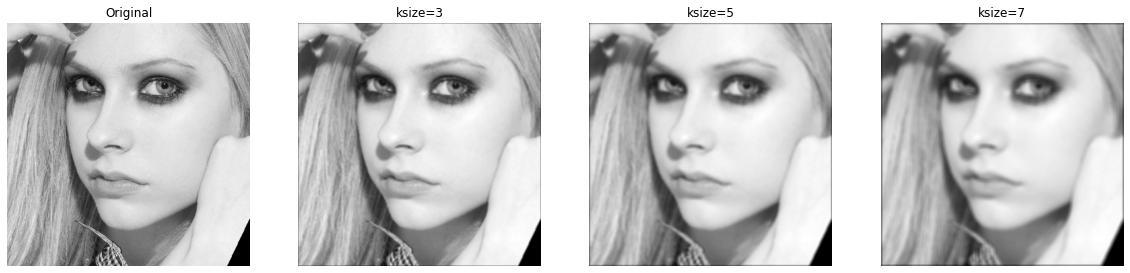

In [7]:
filter_5 = Filter(img, ksize=5, padding='same')
filter_7 = Filter(img, ksize=7, padding='same')
filter_3 = Filter(img, ksize=3, padding='same')
# Averaging filter
Average_kernel_5 = 1/(5*5) * np.ones((5, 5))
Average_img_5 = filter_5.Convolution(Average_kernel_5)
Average_kernel_7 = 1/(7*7) * np.ones((7, 7))
Average_img_7 = filter_7.Convolution(Average_kernel_7)
Average_kernel_3 = 1/(3*3) * np.ones((3, 3))
Average_img_3 = filter_3.Convolution(Average_kernel_3)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Original')
_ = plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('ksize=3')
_ = plt.imshow(Average_img_3, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('ksize=5')
_ = plt.imshow(Average_img_5, cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.title('ksize=7')
_ = plt.imshow(Average_img_7, cmap='gray')

The larger the kernel's size is, the blurrer the image becomes. 

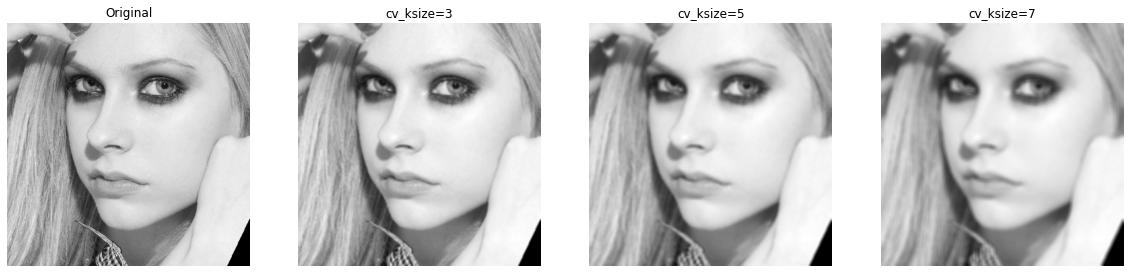

In [8]:
# Opencv average filter
cv_average_img_3 = cv2.filter2D(src=img, ddepth=-1, kernel=Average_kernel_3)
cv_average_img_5 = cv2.filter2D(src=img, ddepth=-1, kernel=Average_kernel_5)
cv_average_img_7 = cv2.filter2D(src=img, ddepth=-1, kernel=Average_kernel_7)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Original')
_ = plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('cv_ksize=3')
_ = plt.imshow(cv_average_img_3, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('cv_ksize=5')
_ = plt.imshow(cv_average_img_5, cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.title('cv_ksize=7')
_ = plt.imshow(cv_average_img_7, cmap='gray')

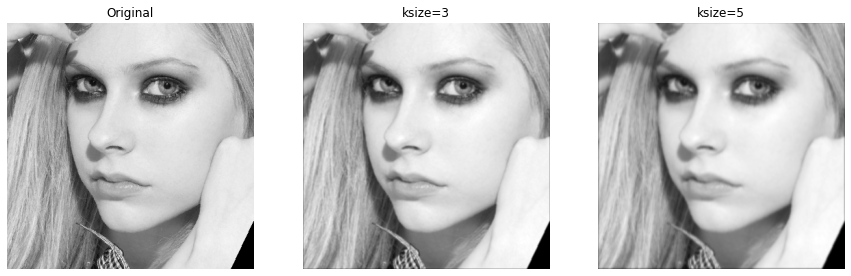

In [9]:
# Weighted avarage filter
Weighted_avarage_kernel_3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * 1/16
Weighted_avarage_img_3  = filter_3.Convolution(Weighted_avarage_kernel_3)
a = np.array([[0.5, 0.5, 2, 0.5, 0.5]])
b = np.array([[1, 1, 4, 1, 1]])
Weighted_avarage_kernel_5 = np.vstack([a, a, b, a, a]) * 1/24
Weighted_avarage_img_5  = filter_5.Convolution(Weighted_avarage_kernel_5)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original')
_ = plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('ksize=3')
_ = plt.imshow(Weighted_avarage_img_3, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('ksize=5')
_ = plt.imshow(Weighted_avarage_img_5, cmap='gray')

The weighted average image is not as blur as the average image of the same kernel size.

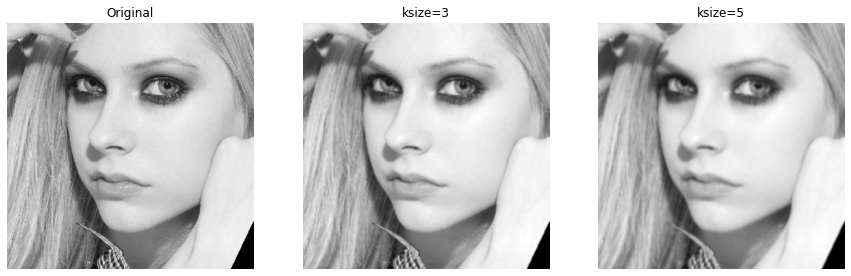

In [10]:
# Opencv weighted avarage filter
cv_weighted_average_img_3 = cv2.filter2D(src=img, ddepth=-1, kernel=Weighted_avarage_kernel_3)
cv_weighted_average_img_5 = cv2.filter2D(src=img, ddepth=-1, kernel=Weighted_avarage_kernel_5)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original')
_ = plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('ksize=3')
_ = plt.imshow(cv_weighted_average_img_3, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('ksize=5')
_ = plt.imshow(cv_weighted_average_img_5, cmap='gray')

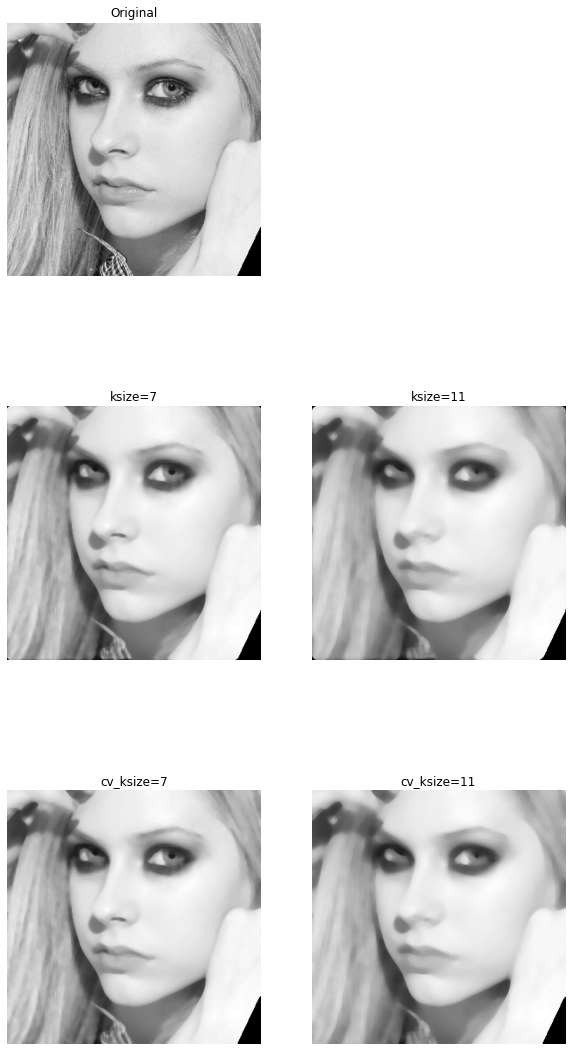

In [11]:
# median filter
filter_11 = Filter(img, ksize=11, padding='same')
median_img_7 = filter_7.Nonlinear('median')
median_img_11 = filter_11.Nonlinear('median')
cv_median_img_7 = cv2.medianBlur(img.astype(np.uint8), 7)
cv_median_img_11 = cv2.medianBlur(img.astype(np.uint8), 11)
plt.figure(figsize=(10, 20))
plt.subplot(3, 2, 1)
plt.axis('off')
plt.title('Original')
_ = plt.imshow(img, cmap='gray')
plt.subplot(3, 2, 3)
plt.axis('off')
plt.title('ksize=7')
_ = plt.imshow(median_img_7, cmap='gray')
plt.subplot(3, 2, 4)
plt.axis('off')
plt.title('ksize=11')
_ = plt.imshow(median_img_11, cmap='gray')
plt.subplot(3, 2, 5)
plt.axis('off')
plt.title('cv_ksize=7')
_ = plt.imshow(cv_median_img_7, cmap='gray')
plt.subplot(3, 2, 6)
plt.axis('off')
plt.title('cv_ksize=11')
_ = plt.imshow(cv_median_img_11, cmap='gray')

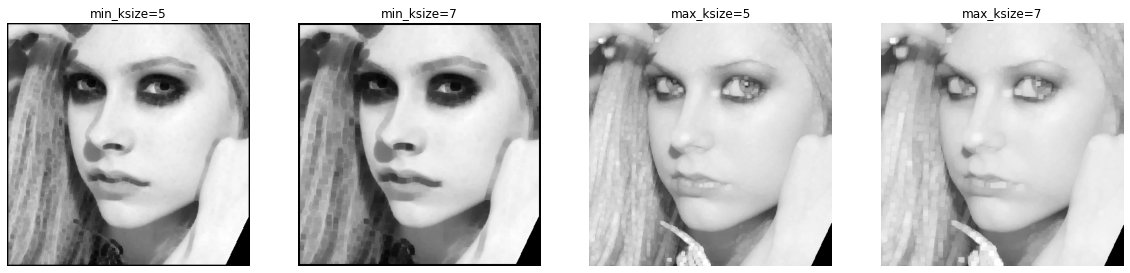

In [12]:
# min, max filter
min_img_7 = filter_7.Nonlinear('min')
min_img_5 = filter_5.Nonlinear('min')
max_img_7 = filter_7.Nonlinear('max')
max_img_5 = filter_5.Nonlinear('max')
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('min_ksize=5')
_ = plt.imshow(min_img_5, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('min_ksize=7')
_ = plt.imshow(min_img_7, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('max_ksize=5')
_ = plt.imshow(max_img_5, cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.title('max_ksize=7')
_ = plt.imshow(max_img_7, cmap='gray')

In [13]:
# Laplacian filter
Laplacian_kernel_a = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
Laplacian_kernel_b = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
Laplacian_kernel_c = -Laplacian_kernel_a
Laplacian_kernel_d = -Laplacian_kernel_b

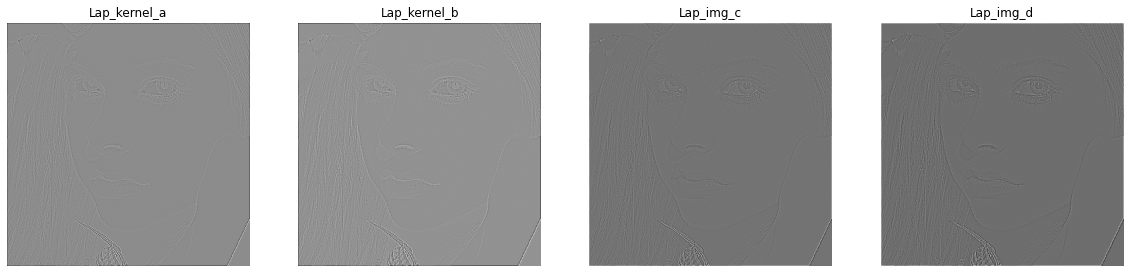

In [14]:
Lap_img_a = filter_3.Convolution(Laplacian_kernel_a)
Lap_img_b = filter_3.Convolution(Laplacian_kernel_b)
Lap_img_c = filter_3.Convolution(Laplacian_kernel_c)
Lap_img_d = filter_3.Convolution(Laplacian_kernel_d)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Lap_kernel_a')
_ = plt.imshow(Lap_img_a, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Lap_kernel_b')
_ = plt.imshow(Lap_img_b, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('Lap_img_c')
_ = plt.imshow(Lap_img_c, cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.title('Lap_img_d')
_ = plt.imshow(Lap_img_d, cmap='gray')

We cannot see the details easily here. This is may be because of noise. So, we should first perform noise reduction by applying one average filter.

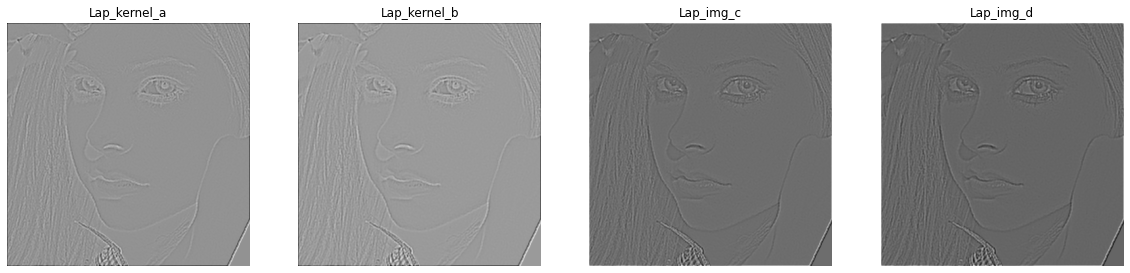

In [15]:
filter_3_blur = Filter(Average_img_3, ksize=3, padding='valid')
Lap_img_blur_a = filter_3_blur.Convolution(Laplacian_kernel_a)
Lap_img_blur_b = filter_3_blur.Convolution(Laplacian_kernel_b)
Lap_img_blur_c = filter_3_blur.Convolution(Laplacian_kernel_c)
Lap_img_blur_d = filter_3_blur.Convolution(Laplacian_kernel_d)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Lap_kernel_a')
_ = plt.imshow(Lap_img_blur_a, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Lap_kernel_b')
_ = plt.imshow(Lap_img_blur_b, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('Lap_img_c')
_ = plt.imshow(Lap_img_blur_c, cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.title('Lap_img_d')
_ = plt.imshow(Lap_img_blur_d, cmap='gray')

The details are much more clearer.

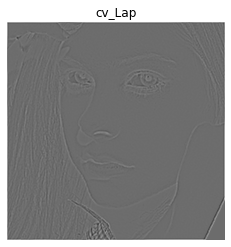

In [16]:
# Opencv Laplacian
cv_Lap = cv2.Laplacian(Average_img_3, -1)
plt.axis('off')
plt.title('cv_Lap')
_ = plt.imshow(cv_Lap, cmap='gray')

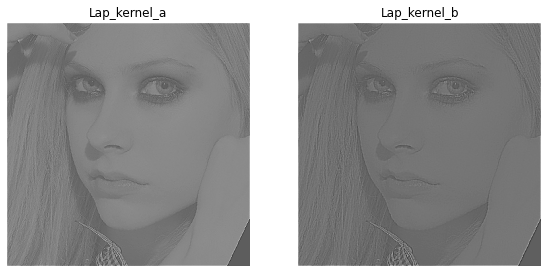

In [17]:
# Laplacian + Addition
Laplacian_addition_a = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
Laplacian_addition_b = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
Lap_addition_img_a = filter_3.Convolution(Laplacian_addition_a)
Lap_addition_img_b = filter_3.Convolution(Laplacian_addition_b)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Lap_kernel_a')
_ = plt.imshow(Lap_addition_img_a, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Lap_kernel_b')
_ = plt.imshow(Lap_addition_img_b, cmap='gray')

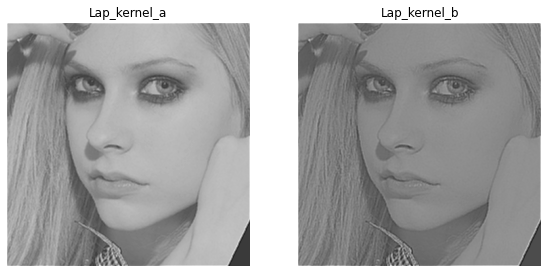

In [18]:
# Perform noise reduction + Laplacian + Addition
Lap_addition_imgblur_a = filter_3_blur.Convolution(Laplacian_addition_a)
Lap_addition_imgblur_b = filter_3_blur.Convolution(Laplacian_addition_b)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Lap_kernel_a')
_ = plt.imshow(Lap_addition_imgblur_a, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Lap_kernel_b')
_ = plt.imshow(Lap_addition_imgblur_b, cmap='gray')

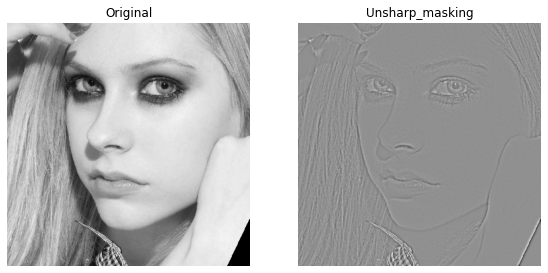

In [19]:
# Unsharp masking
img1 = img.copy()
blurred_img1 = cv2.filter2D(src=img1, ddepth=-1, kernel=Average_kernel_7)
img2 = (img1 - blurred_img1)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Original')
_ = plt.imshow(img1, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Unsharp_masking')
_ = plt.imshow(img2, cmap='gray')

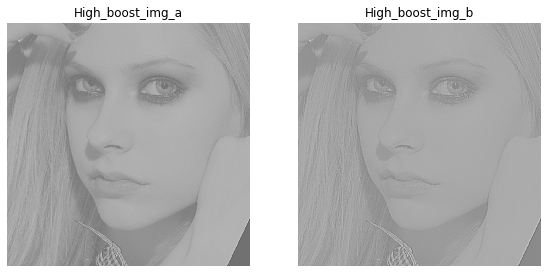

In [20]:
# High_boost filter
A = 1.7
High_boost_a = np.array([[0, -1, 0], [-1, A+4, -1], [0, -1, 0]])
High_boost_b = np.array([[-1, -1, -1], [-1, A+8, -1], [-1, -1, -1]])
High_boost_img_a = cv2.filter2D(src=img, ddepth=-1, kernel=High_boost_a)
High_boost_img_b = cv2.filter2D(src=img, ddepth=-1, kernel=High_boost_b)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('High_boost_img_a')
_ = plt.imshow(High_boost_img_a, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('High_boost_img_b')
_ = plt.imshow(High_boost_img_b, cmap='gray')

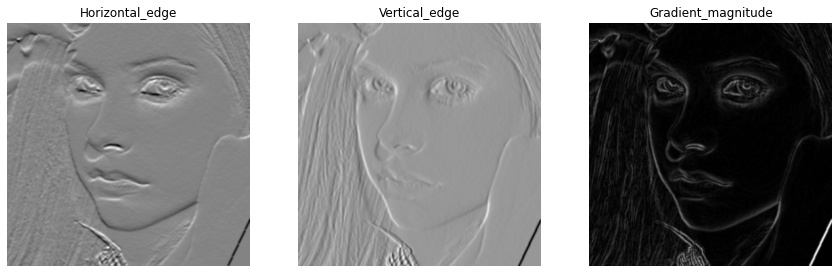

In [21]:
# Sobel
Sx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
Sy = Sx.T
# Blur the image using GaussianBlur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

filter_detect = Filter(img_blur, ksize=3, padding='valid')
# Sobel operators
Gx = filter_detect.Convolution(Sx)
Gy = filter_detect.Convolution(Sy)
# Gradient magnitude
G = np.abs(Gx) + np.abs(Gy)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Horizontal_edge')
_ = plt.imshow(Gx, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Vertical_edge')
_ = plt.imshow(Gy, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('Gradient_magnitude')
_ = plt.imshow(G, cmap='gray')

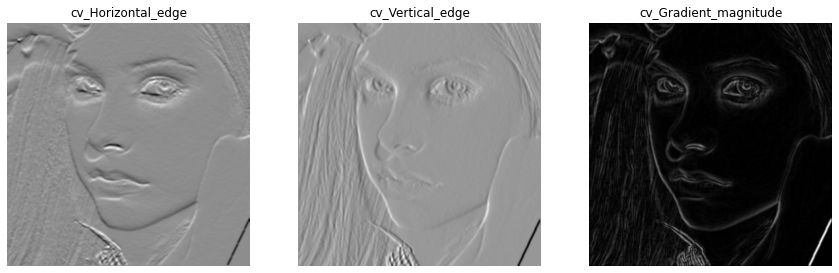

In [22]:
# OpenCv sobel
gX = cv2.Sobel(img_blur, ddepth=-1, dx=0, dy=1, ksize=3)
gY = cv2.Sobel(img_blur, ddepth=-1, dx=1, dy=0, ksize=3)
g = np.abs(gX) + np.abs(gY)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('cv_Horizontal_edge')
_ = plt.imshow(gX, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('cv_Vertical_edge')
_ = plt.imshow(gY, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('cv_Gradient_magnitude')
_ = plt.imshow(g, cmap='gray')

The results of opencv's sobel verison are not much different from ours.

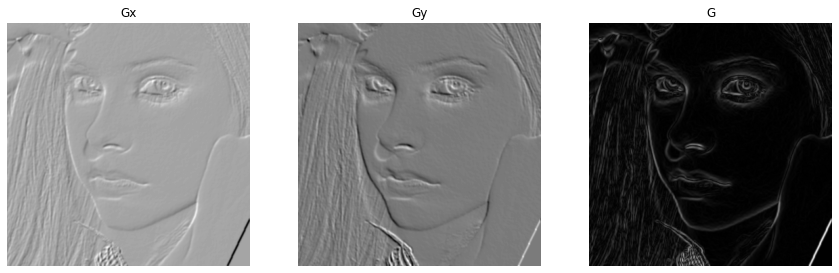

In [23]:
# Robert
Rx = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]])
Ry = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
# Sobel operators
Gx = filter_detect.Convolution(Rx)
Gy = filter_detect.Convolution(Ry)
# Gradient magnitude
G = np.abs(Gx) + np.abs(Gy)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('Gx')
_ = plt.imshow(Gx, cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.title('Gy')
_ = plt.imshow(Gy, cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.title('G')
_ = plt.imshow(G, cmap='gray')